In [2]:
# Intsall Tools
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost jupyter

In [3]:
# Load Data

import pandas as pd
data = pd.read_csv('loan.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exploratory Data Analysis
# Look up the DataDictionary
# Understanding the Data 

data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
data.shape

(2260668, 145)

In [7]:
data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object

In [8]:
# Check and Handle missing values
# Count missing values in each column

missing_values = data.isnull().sum()

with pd.option_context('display.max_rows', None):
    print(missing_values)

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [9]:
# Filter columns with missing values

missing_columns = missing_values[missing_values > 0]

with pd.option_context('display.max_rows', None):
    print(missing_columns)

id                                            2260668
member_id                                     2260668
emp_title                                      166969
emp_length                                     146907
annual_inc                                          4
url                                           2260668
desc                                          2134603
title                                           23326
zip_code                                            1
dti                                              1711
delinq_2yrs                                        29
earliest_cr_line                                   29
inq_last_6mths                                     30
mths_since_last_delinq                        1158502
mths_since_last_record                        1901512
open_acc                                           29
pub_rec                                            29
revol_util                                       1802
total_acc                   

In [10]:
#print view of missing data as a percentage of total rows

missing_percentage = (missing_columns / len(data)) * 100

with pd.option_context('display.max_rows', None):
    print(missing_percentage.sort_values(ascending=False))

id                                            100.000000
url                                           100.000000
member_id                                     100.000000
orig_projected_additional_accrued_interest     99.627278
hardship_length                                99.530537
hardship_reason                                99.530537
hardship_status                                99.530537
deferral_term                                  99.530537
hardship_amount                                99.530537
hardship_start_date                            99.530537
hardship_end_date                              99.530537
payment_plan_start_date                        99.530537
hardship_loan_status                           99.530537
hardship_dpd                                   99.530537
hardship_payoff_balance_amount                 99.530537
hardship_last_payment_amount                   99.530537
hardship_type                                  99.530537
debt_settlement_flag_date      

In [11]:
# drop columns with high missing percentage (and it is not critical)

data = data.drop(columns=['id'])
data = data.drop(columns=['url'])
data = data.drop(columns=['member_id'])
data = data.drop(columns=['orig_projected_additional_accrued_interest'])
data = data.drop(columns=['hardship_length'])
data = data.drop(columns=['hardship_reason'])
data = data.drop(columns=['hardship_status'])
data = data.drop(columns=['deferral_term'])
data = data.drop(columns=['hardship_amount'])
data = data.drop(columns=['hardship_start_date'])
data = data.drop(columns=['hardship_end_date'])
data = data.drop(columns=['payment_plan_start_date'])
data = data.drop(columns=['hardship_loan_status'])
data = data.drop(columns=['hardship_dpd'])
data = data.drop(columns=['hardship_payoff_balance_amount'])
data = data.drop(columns=['hardship_last_payment_amount'])
data = data.drop(columns=['hardship_type'])
data = data.drop(columns=['debt_settlement_flag_date'])
data = data.drop(columns=['settlement_status'])
data = data.drop(columns=['settlement_date'])
data = data.drop(columns=['settlement_amount'])
data = data.drop(columns=['settlement_percentage'])
data = data.drop(columns=['settlement_term'])
data = data.drop(columns=['sec_app_mths_since_last_major_derog'])
data = data.drop(columns=['sec_app_revol_util'])
data = data.drop(columns=['revol_bal_joint'])
data = data.drop(columns=['sec_app_open_acc'])
data = data.drop(columns=['sec_app_chargeoff_within_12_mths'])
data = data.drop(columns=['sec_app_open_act_il'])
data = data.drop(columns=['sec_app_collections_12_mths_ex_med'])
data = data.drop(columns=['sec_app_mort_acc'])
data = data.drop(columns=['sec_app_inq_last_6mths'])
data = data.drop(columns=['sec_app_earliest_cr_line'])
data = data.drop(columns=['sec_app_num_rev_accts'])
data = data.drop(columns=['verification_status_joint'])
data = data.drop(columns=['dti_joint'])
data = data.drop(columns=['annual_inc_joint'])
data = data.drop(columns=['desc'])
data = data.drop(columns=['mths_since_last_record'])
data = data.drop(columns=['mths_since_recent_bc_dlq'])
data = data.drop(columns=['mths_since_last_major_derog'])
data = data.drop(columns=['mths_since_recent_revol_delinq'])
data = data.drop(columns=['next_pymnt_d'])
data = data.drop(columns=['mths_since_last_delinq'])

In [12]:
# Check and Handle missing values
# Count missing values in each column

missing_values = data.isnull().sum()

with pd.option_context('display.max_rows', None):
    print(missing_values)

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                      166969
emp_length                     146907
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                           23326
zip_code                            1
addr_state                          0
dti                              1711
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     30
open_acc                           29
pub_rec                            29
revol_bal   

In [13]:
# Filter columns with missing values

missing_columns = missing_values[missing_values > 0]

with pd.option_context('display.max_rows', None):
    print(missing_columns)

emp_title                      166969
emp_length                     146907
annual_inc                          4
title                           23326
zip_code                            1
dti                              1711
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     30
open_acc                           29
pub_rec                            29
revol_util                       1802
total_acc                          29
last_pymnt_d                     2426
last_credit_pull_d                 73
collections_12_mths_ex_med        145
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866130
open_act_il                    866129
open_il_12m                    866129
open_il_24m                    866129
mths_since_rcnt_il             909924
total_bal_il                   866129
il_util                       1068850
open_rv_12m 

In [14]:
#print view of missing data as a percentage of total rows

missing_percentage = (missing_columns / len(data)) * 100

with pd.option_context('display.max_rows', None):
    print(missing_percentage.sort_values(ascending=False))

il_util                       47.280273
mths_since_rcnt_il            40.250227
all_util                      38.322655
inq_last_12m                  38.313012
total_cu_tl                   38.313012
open_acc_6m                   38.313012
open_act_il                   38.312968
inq_fi                        38.312968
max_bal_bc                    38.312968
open_rv_24m                   38.312968
open_rv_12m                   38.312968
total_bal_il                  38.312968
open_il_24m                   38.312968
open_il_12m                   38.312968
mths_since_recent_inq         13.068482
emp_title                      7.385826
num_tl_120dpd_2m               6.796973
emp_length                     6.498389
mo_sin_old_il_acct             6.151766
bc_util                        3.364979
percent_bc_gt_75               3.334368
bc_open_to_buy                 3.314728
mths_since_recent_bc           3.247359
pct_tl_nvr_dlq                 3.115495
avg_cur_bal                    3.111735


In [15]:
# Drop rows for those with low missing percentages

data = data.dropna(subset=['emp_title'])

In [16]:
data = data.dropna(subset=['num_tl_120dpd_2m'])

In [17]:
data = data.dropna(subset=['mo_sin_old_il_acct'])

In [18]:
data = data.dropna(subset=['bc_util'])

In [19]:
data = data.dropna(subset=['title'])

In [20]:
data = data.dropna(subset=['last_pymnt_d'])

In [21]:
data = data.dropna(subset=['emp_length'])

In [22]:
data = data.dropna(subset=['pct_tl_nvr_dlq'])

In [23]:
data = data.dropna(subset=['dti'])

In [24]:
data = data.dropna(subset=['last_credit_pull_d'])

In [25]:
data = data.dropna(subset=['mths_since_recent_bc'])

In [26]:
data = data.dropna(subset=['zip_code'])

In [27]:
data = data.dropna(subset=['inq_last_6mths'])

In [28]:
data = data.dropna(subset=['num_rev_accts'])

In [29]:
# Fill the columns that are null with 0 value
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(0)

<Axes: xlabel='count', ylabel='loan_status'>

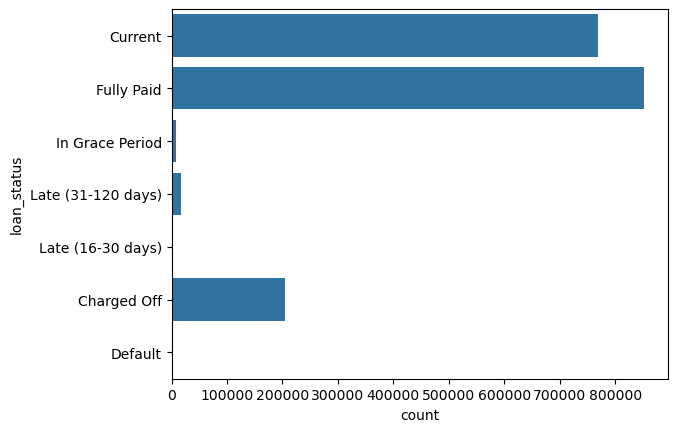

In [30]:
# Analyse Target Variable
# Visualise the distribution of loan_status

import seaborn as sns
sns.countplot(data['loan_status'])

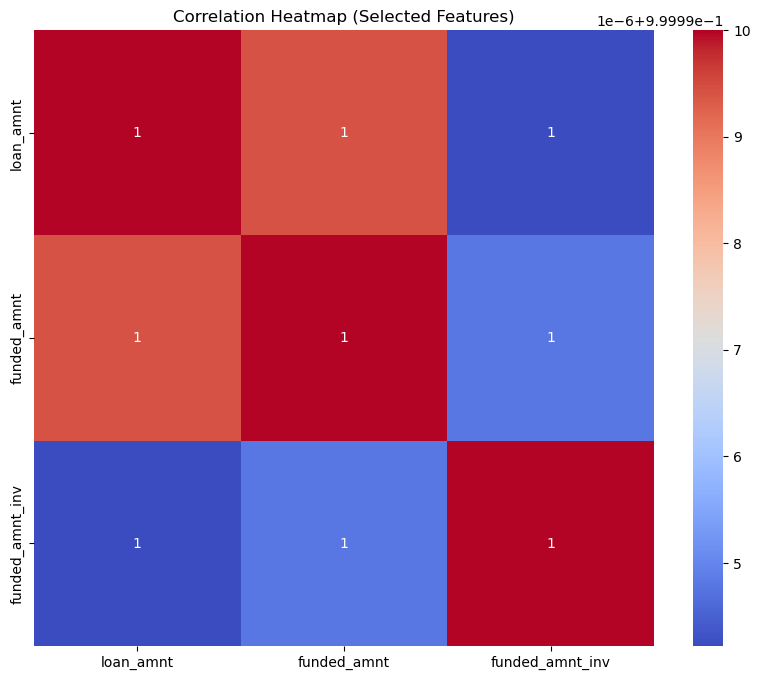

In [31]:
# Feature relationships
# Use correlation heatmaps to identify relationships

import matplotlib.pyplot as plt
selected_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv'] 
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

In [32]:
# Split into independent and dependent variables

X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [33]:
#Identify High Cardinality Columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")

term: 2 unique values
grade: 7 unique values
sub_grade: 35 unique values
emp_title: 441720 unique values
emp_length: 11 unique values
home_ownership: 6 unique values
verification_status: 3 unique values
issue_d: 77 unique values
loan_status: 7 unique values
pymnt_plan: 2 unique values
purpose: 14 unique values
title: 35171 unique values
zip_code: 950 unique values
addr_state: 51 unique values
earliest_cr_line: 733 unique values
initial_list_status: 2 unique values
last_pymnt_d: 78 unique values
last_credit_pull_d: 80 unique values
application_type: 2 unique values
hardship_flag: 2 unique values
disbursement_method: 2 unique values
debt_settlement_flag: 2 unique values


In [34]:
# Drop columns with very high cardinality if they are not cruicial to analysis. 
X = X.drop(columns=['emp_title'])
X = X.drop(columns=['issue_d'])
X = X.drop(columns=['title'])
X = X.drop(columns=['zip_code'])
X = X.drop(columns=['earliest_cr_line'])
X = X.drop(columns=['last_pymnt_d'])
X = X.drop(columns=['last_credit_pull_d'])

In [35]:
# Data Preprocessing

# Encode Categorical Variables - Convert non-numeric columns to numeric using one-hot encoding or label encoding

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Apply OneHotEncoder to all categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough') # 'passthrough' keeps other columns as is

X = np.array(ct.fit_transform(X))

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and categorical columns
df_X = pd.DataFrame(X)
numeric_columns = df_X.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
sc = StandardScaler()

# Apply scaling only to numeric columns
X_train[numeric_columns] = sc.fit_transform(X[numeric_columns])
X_test[numeric_columns] = sc.transform(X[numeric_columns])

In [55]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = xgb_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 40962     17      0     91      1      0      0]
 [     7 152270      0   1171      8      0     99]
 [     0      4      0      0      0      0      1]
 [     5     49      0 170177      1      0      2]
 [     0   1389      0     17      3      3     38]
 [     0    554      0      7      1      5     26]
 [     0   3069      0     17      6      1    464]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41071
           1       0.97      0.99      0.98    153555
           2       0.00      0.00      0.00         5
           3       0.99      1.00      1.00    170234
           4       0.15      0.00      0.00      1450
           5       0.56      0.01      0.02       593
           6       0.74      0.13      0.22      3557

    accuracy                           0.98    370465
   macro avg       0.63      0.45      0.46    370465
weighted avg       0.98      0.98      0.98    370465



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
